<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [4]:
## Write your code here

print(df.dtypes)

print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics for Numerical Columns:")
print(df.describe())

print("\nSummary Statistics for Categorical Columns:")
print(df.describe(include='object'))


ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None

Summary Statistics for Numerical Columns:
         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16360.000000   6.000000e+04      4.00

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [6]:
## Write your code here
print("Total Missing Values Per Column:\n")
print(df.isnull().sum())

numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

print("\nMissing Values After Imputation:\n")
print(df.isnull().sum())

output_file = "cleaned_survey_data.csv"
df.to_csv(output_file, index=False)
print(f"Cleaned dataset saved as {output_file}")


Total Missing Values Per Column:

ResponseId             0
MainBranch             0
Age                    0
Employment             0
RemoteWork             0
                      ..
JobSatPoints_11        0
SurveyLength           0
SurveyEase             0
ConvertedCompYearly    0
JobSat                 0
Length: 114, dtype: int64

Missing Values After Imputation:

ResponseId             0
MainBranch             0
Age                    0
Employment             0
RemoteWork             0
                      ..
JobSatPoints_11        0
SurveyLength           0
SurveyEase             0
ConvertedCompYearly    0
JobSat                 0
Length: 114, dtype: int64
Cleaned dataset saved as cleaned_survey_data.csv


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [7]:
## Write your code here

print("\nEmployment Distribution:\n")
print(df['Employment'].value_counts())

print("\nJob Satisfaction Distribution:\n")
print(df['JobSat'].value_counts())

print("\nYears of Professional Coding Experience Distribution:\n")
print(df['YearsCodePro'].value_counts())


Employment Distribution:

Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking 

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


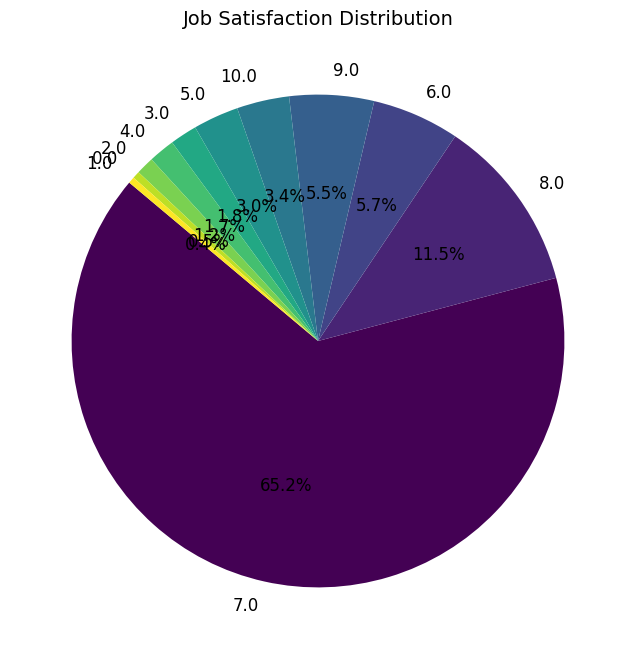

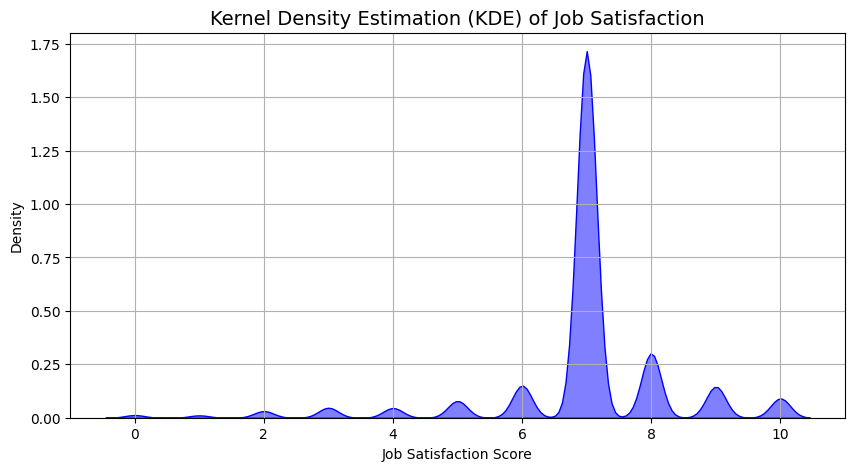

In [8]:
## Write your code here
df = df.dropna(subset=['JobSat'])

plt.figure(figsize=(8, 8))
df['JobSat'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, cmap='viridis', fontsize=12)

plt.title("Job Satisfaction Distribution", fontsize=14)
plt.ylabel("")  # Hide y-label for better aesthetics
plt.show()

plt.figure(figsize=(10, 5))
sns.kdeplot(df['JobSat'], fill=True, color="blue", alpha=0.5)

plt.title("Kernel Density Estimation (KDE) of Job Satisfaction", fontsize=14)
plt.xlabel("Job Satisfaction Score")
plt.ylabel("Density")
plt.grid(True)
plt.show()


### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 190.0 MB/s eta 0:00:00
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45355 sha256=3a096cfa934c8c4c0a7fd65df58662fb5f9f47b10935b29d3ad4a226c7d7f9f5
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/c2/47/0c/f014c55a1cfd56dce41a1cafd23e3c590652b5e71330cc181c
Successfully built matplotlib-venn


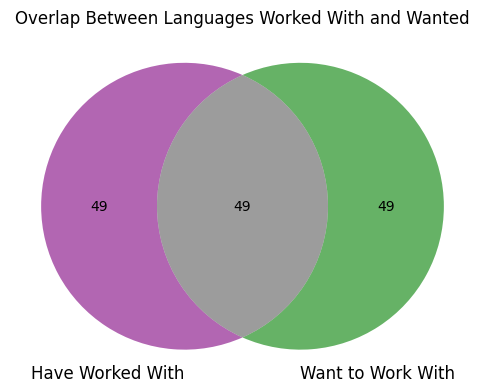

<Figure size 1200x600 with 0 Axes>

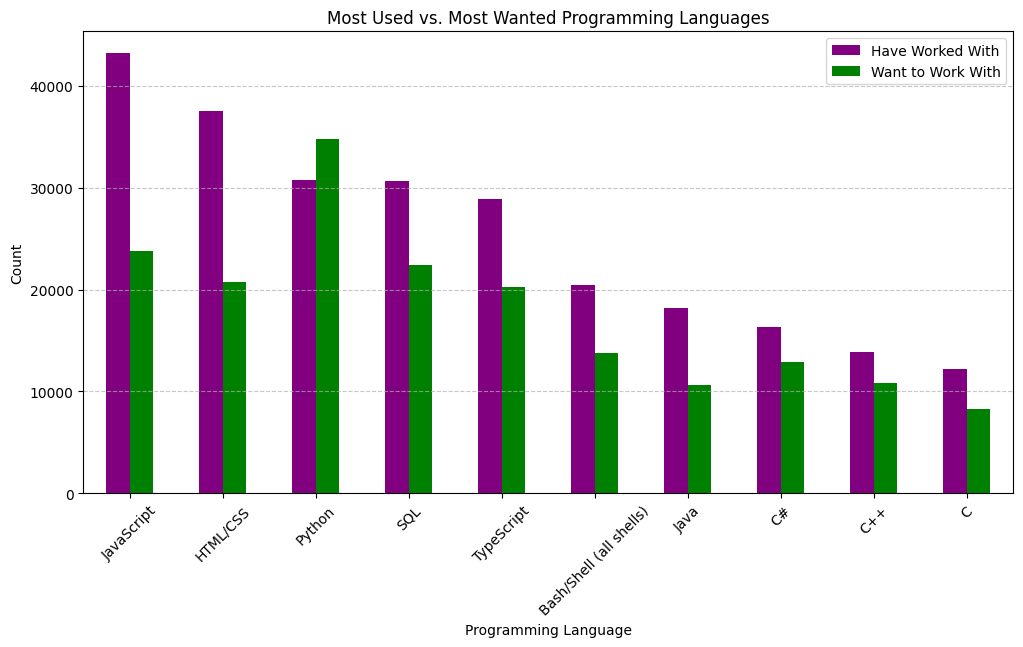

In [10]:
## Write your code here
!pip install matplotlib-venn

from collections import Counter
from matplotlib_venn import venn2

df = df.dropna(subset=['LanguageHaveWorkedWith', 'LanguageWantToWorkWith'])

worked_languages = Counter([lang.strip() for langs in df['LanguageHaveWorkedWith'].dropna() for lang in langs.split(';')])
wanted_languages = Counter([lang.strip() for langs in df['LanguageWantToWorkWith'].dropna() for lang in langs.split(';')])

df_languages = pd.DataFrame({'Language': list(set(worked_languages.keys()).union(set(wanted_languages.keys())))})
df_languages['HaveWorkedWith'] = df_languages['Language'].map(lambda x: worked_languages.get(x, 0))
df_languages['WantToWorkWith'] = df_languages['Language'].map(lambda x: wanted_languages.get(x, 0))

df_languages = df_languages.sort_values(by='HaveWorkedWith', ascending=False).head(10)

plt.figure(figsize=(6,6))
venn2(
    subsets=(len(worked_languages), len(wanted_languages), len(set(worked_languages.keys()) & set(wanted_languages.keys()))),
    set_labels=("Have Worked With", "Want to Work With"),
    set_colors=('purple', 'green'),
    alpha=0.6
)
plt.title("Overlap Between Languages Worked With and Wanted")
plt.show()

plt.figure(figsize=(12, 6))
df_languages.set_index("Language").plot(kind="bar", figsize=(12,6), color=["purple", "green"])
plt.title("Most Used vs. Most Wanted Programming Languages")
plt.xlabel("Programming Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(["Have Worked With", "Want to Work With"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


<Figure size 1200x600 with 0 Axes>

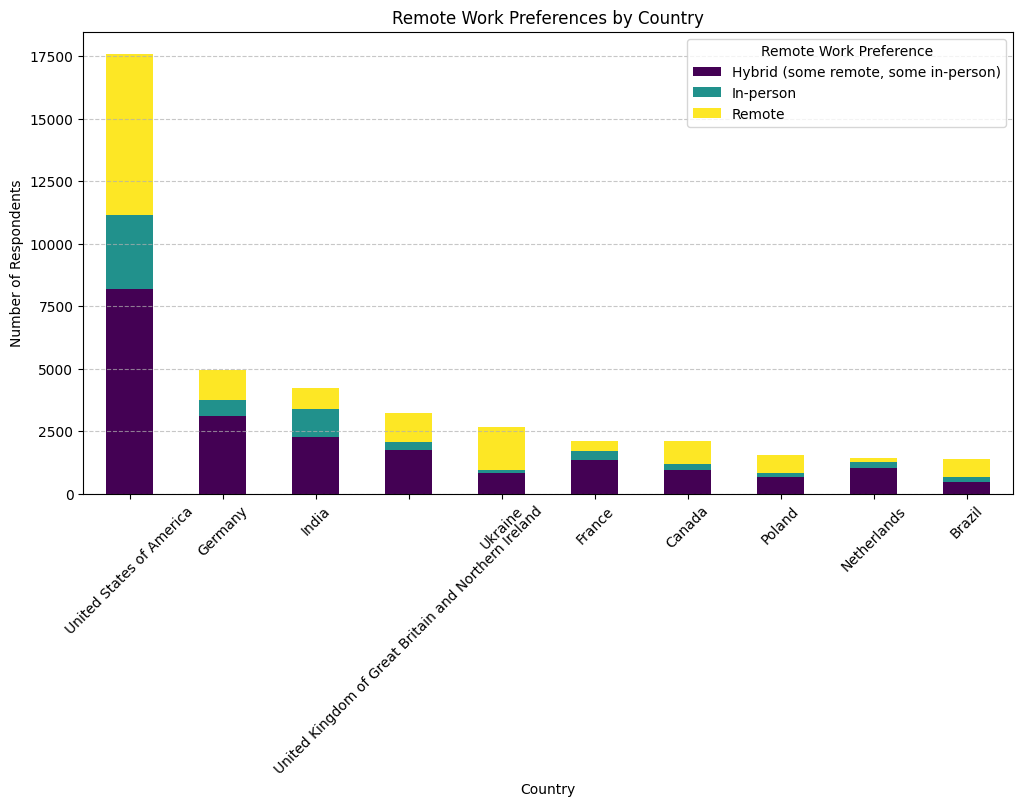

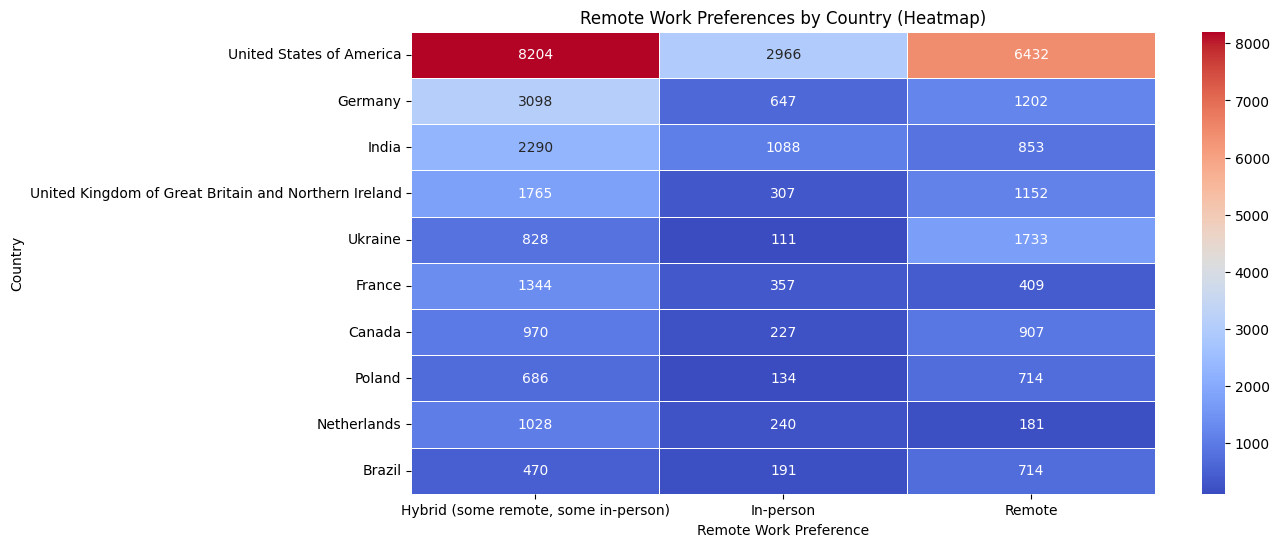

In [11]:
## Write your code here
df = df.dropna(subset=['RemoteWork', 'Country'])

remote_work_counts = df.groupby(['Country', 'RemoteWork']).size().unstack().fillna(0)

top_countries = df['Country'].value_counts().head(10).index
remote_work_counts = remote_work_counts.loc[top_countries]

plt.figure(figsize=(12, 6))
remote_work_counts.plot(kind='bar', stacked=True, colormap="viridis", figsize=(12,6))

plt.title("Remote Work Preferences by Country")
plt.xlabel("Country")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.legend(title="Remote Work Preference")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(remote_work_counts, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)

plt.title("Remote Work Preferences by Country (Heatmap)")
plt.xlabel("Remote Work Preference")
plt.ylabel("Country")
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


Pearson Correlation between Job Satisfaction and Years of Professional Coding Experience: 0.0665
Spearman Correlation between Job Satisfaction and Years of Professional Coding Experience: 0.1065


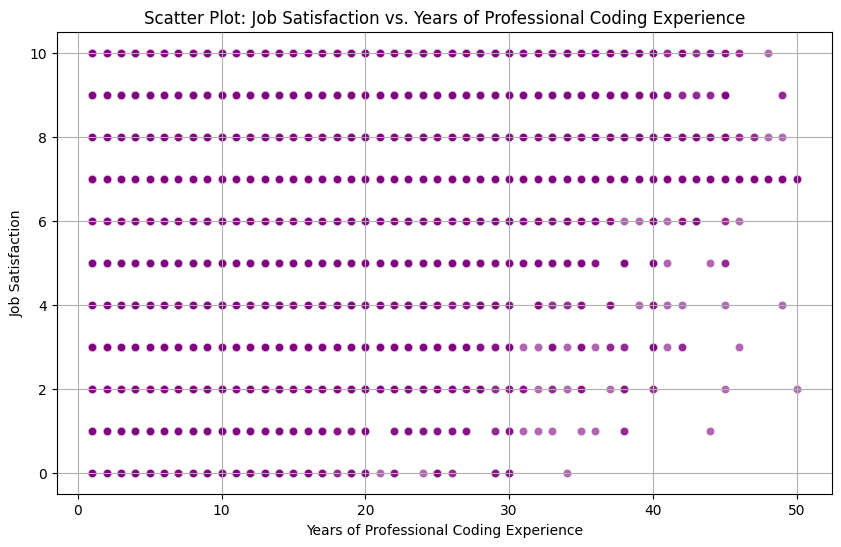

In [13]:
## Write your code here
# Import necessary libraries
from scipy.stats import pearsonr, spearmanr

df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

df = df.dropna(subset=['JobSat', 'YearsCodePro'])

pearson_corr, _ = pearsonr(df['JobSat'], df['YearsCodePro'])
print(f"Pearson Correlation between Job Satisfaction and Years of Professional Coding Experience: {pearson_corr:.4f}")

spearman_corr, _ = spearmanr(df['JobSat'], df['YearsCodePro'])
print(f"Spearman Correlation between Job Satisfaction and Years of Professional Coding Experience: {spearman_corr:.4f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsCodePro', y='JobSat', data=df, color='purple', alpha=0.6)

plt.title("Scatter Plot: Job Satisfaction vs. Years of Professional Coding Experience")
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Job Satisfaction")
plt.grid(True)
plt.show()

### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


In [ ]:
## Write your code here
df = df.dropna(subset=['Employment', 'EdLevel'])

employment_education_crosstab = pd.crosstab(df['EdLevel'], df['Employment'])

print(employment_education_crosstab)

# ---------------------------
# 2. Stacked Bar Plot
# ---------------------------
# Plotting the cross-tabulation as a stacked bar plot
employment_education_crosstab.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')

plt.title("Employment Status by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.legend(title="Employment Status")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
## Write your code here

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
